In [178]:
import numpy as np 
import pandas as pd 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [208]:
data_path = "Training.csv"

data = pd.read_csv(data_path)

#data.head()

# Reading the train.csv by removing the 
# last column since it's an empty column
data = pd.read_csv(data_path).dropna(axis=1)
datacols = ['itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue', 'cough',
 'high_fever', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite',
 'abdominal_pain', 'diarrhoea', 'chest_pain', 'dizziness', 'excessive_hunger',
 'swelling_joints', 'loss_of_balance', 'irritability', 'painful_walking' ,'prognosis']

# features = [ "muscle_pain","itching","mild_fever",
# "family_history","yellowing_of_eyes","chest_pain",
# "dark_urine","altered_sensorium","cold_hands_and_feets","muscle_weakness",
# "lack_of_concentration","weight_loss","fatigue","continuous_sneezing","high_fever",
# "joint_pain" ,"nausea","stomach_pain","mucoid_sputum" ,"neck_pain",
# "loss_of_appetite","chills","unsteadiness","prognosis"]

# combined_features = [
#     'itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue', 'cough',
#     'high_fever', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite',
#     'abdominal_pain', 'diarrhoea', 'chest_pain', 'dizziness', 'excessive_hunger',
#     'swelling_joints', 'loss_of_balance', 'irritability', 'painful_walking',
#     'muscle_pain', 'mild_fever', 'family_history', 'yellowing_of_eyes', 'dark_urine',
#     'altered_sensorium', 'cold_hands_and_feets', 'muscle_weakness', 'lack_of_concentration',
#     'weight_loss', 'continuous_sneezing', 'stomach_pain', 'mucoid_sputum', 'neck_pain', 'prognosis', 'unsteadiness'
# ]


# symptoms_to_drop = [
#     # Previously dropped
#     "extra_marital_contacts", "receiving_unsterile_injections", "receiving_blood_transfusion",
#     "history_of_alcohol_consumption", "coma", "distention_of_abdomen", "fluid_overload",
#     "toxic_look_(typhos)", "enlarged_thyroid", "abnormal_menstruation", "dischromic _patches",
#     "blackheads", "scurring", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails",
#     "yellow_crust_ooze", "blister", "red_sore_around_nose", "pus_filled_pimples", "rusty_sputum",
#     "mucoid_sputum", "prominent_veins_on_calf", "blood_in_sputum", "stomach_bleeding",
#     "swollen_blood_vessels", "visual_disturbances", "lack_of_concentration", "altered_sensorium",
#     "polyuria", "palpitations", "slurred_speech", "watering_from_eyes",
#     "obesity", "brittle_nails", "puffy_face_and_eyes", "drying_and_tingling_lips",
#     "passage_of_gases", "irritation_in_anus", "foul_smell_of urine", "continuous_feel_of_urine",
#     "unsteadiness", "spinning_movements", "weakness_of_one_body_side", "loss_of_smell",
#     "movement_stiffness", "swelling_joints", "hip_joint_pain", "knee_pain", "neck_pain",
#     "cramps", "bruising", "painful_walking", "pain_in_anal_region", "pain_during_bowel_movements",
#     "sinus_pressure", "congestion", "phlegm", "blurred_and_distorted_vision", "swollen_legs",
#     "swollen_extremeties", "muscle_wasting", "redness_of_eyes", "cold_hands_and_feets"
# ]

# data = data.drop_duplicates()
data = data[datacols]
# data = data.drop(columns=symptoms_to_drop)
data.head()

data.shape[1]
# print(data[data['high_fever'] == 1]['prognosis'].value_counts())/



21

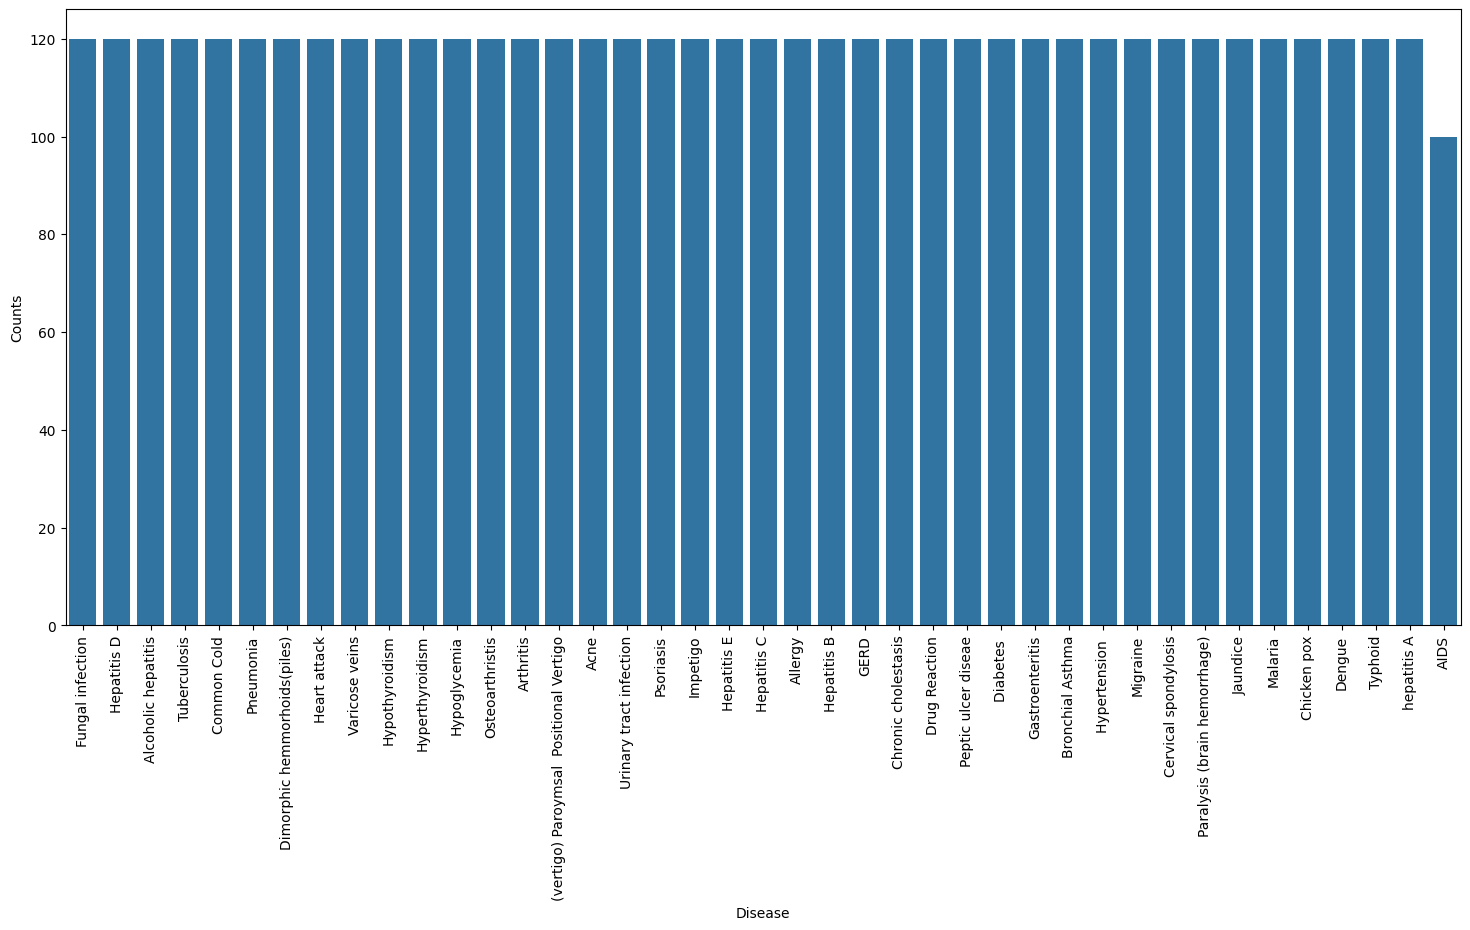

In [209]:
disease_counts = data['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})


plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y = 'Counts' , data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [210]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [211]:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_data.head()


#encoding the target value
test_data['prognosis'] = encoder.fit_transform(test_data['prognosis'])

In [212]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3920, 20), (3920,)
Test: (980, 20), (980,)


In [213]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.88979592 0.87346939 0.87959184 0.88571429 0.88571429 0.92653061
 0.92653061 0.92653061 0.92653061 0.92653061]
Mean Score: 0.9046938775510205
Gaussian NB
Scores: [0.88367347 0.86938776 0.8755102  0.88571429 0.88571429 0.90204082
 0.90204082 0.90204082 0.90204082 0.90204082]
Mean Score: 0.8910204081632654
Random Forest
Scores: [0.8877551  0.87346939 0.87959184 0.88571429 0.88571429 0.92653061
 0.92653061 0.92653061 0.92653061 0.92653061]
Mean Score: 0.9044897959183673


Accuracy on train data by SVM Classifier: 90.96938775510203
Accuracy on test data by SVM Classifier: 88.57142857142857


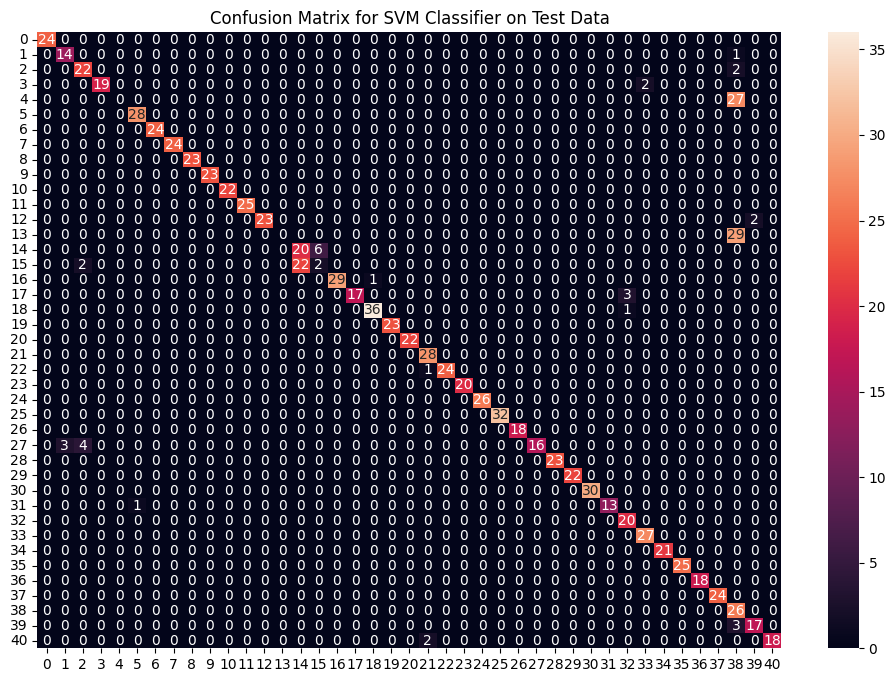

Accuracy on train data by Naive Bayes Classifier: 89.13265306122449
Accuracy on test data by Naive Bayes Classifier: 86.12244897959184


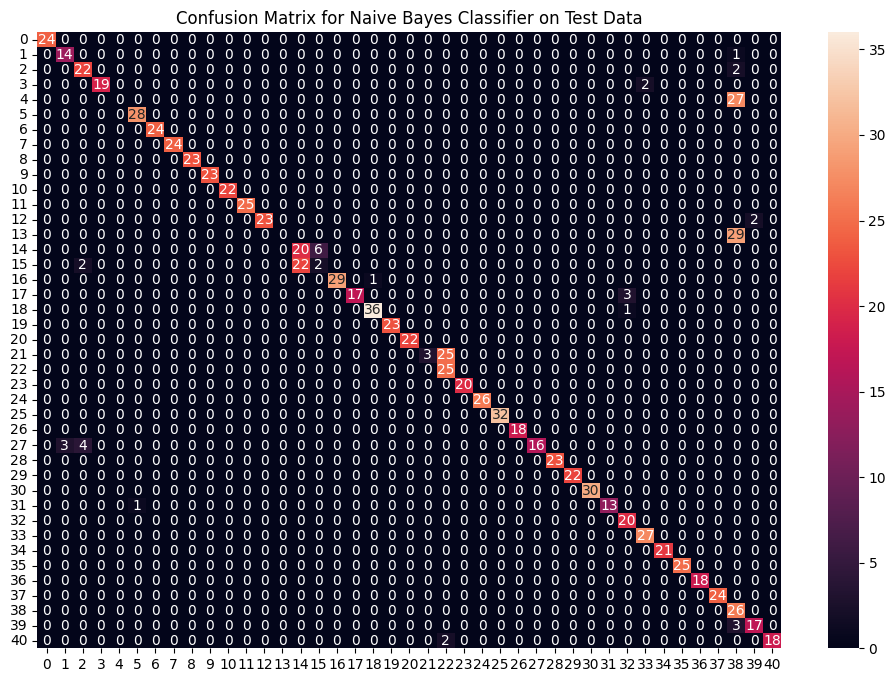

Accuracy on train data by Random Forest Classifier: 90.96938775510203
Accuracy on test data by Random Forest Classifier: 88.57142857142857


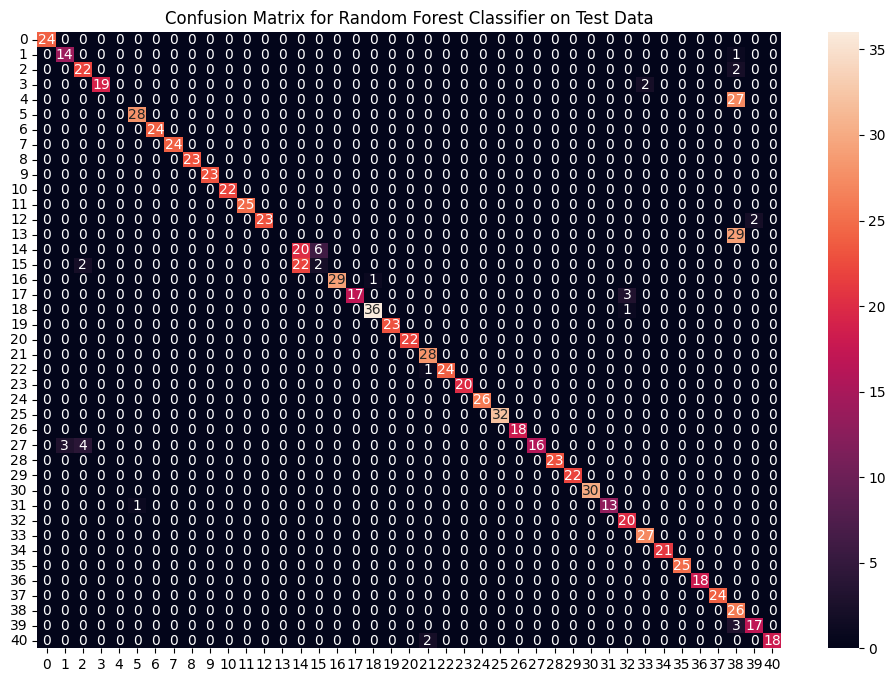

In [214]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 90.47619047619048


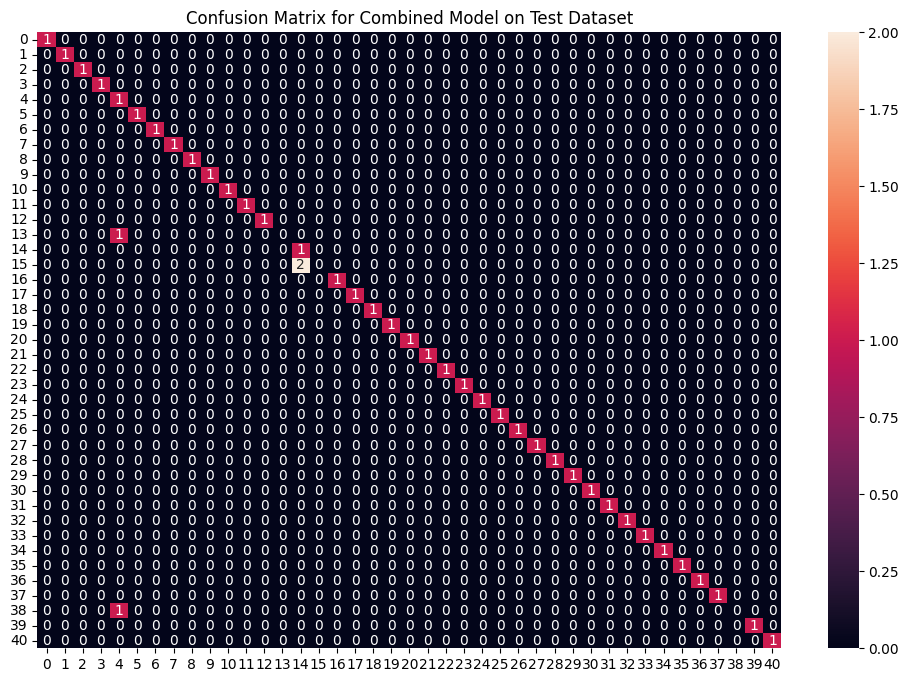

In [215]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
# datacols = ['itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue', 'cough',
#  'high_fever', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite',
#  'abdominal_pain', 'diarrhoea', 'chest_pain', 'dizziness', 'excessive_hunger',
#  'swelling_joints', 'loss_of_balance', 'irritability', 'painful_walking' ,'prognosis']

# symptoms_to_drop = [
#     # Previously dropped
#     "extra_marital_contacts", "receiving_unsterile_injections", "receiving_blood_transfusion",
#     "history_of_alcohol_consumption", "coma", "distention_of_abdomen", "fluid_overload",
#     "toxic_look_(typhos)", "enlarged_thyroid", "abnormal_menstruation", "dischromic _patches",
#     "blackheads", "scurring", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails",
#     "yellow_crust_ooze", "blister", "red_sore_around_nose", "pus_filled_pimples", "rusty_sputum",
#     "mucoid_sputum", "prominent_veins_on_calf", "blood_in_sputum", "stomach_bleeding",
#     "swollen_blood_vessels", "visual_disturbances", "lack_of_concentration", "altered_sensorium",
#     "polyuria", "palpitations", "slurred_speech", "watering_from_eyes",
#     "obesity", "brittle_nails", "puffy_face_and_eyes", "drying_and_tingling_lips",
#     "passage_of_gases", "irritation_in_anus", "foul_smell_of urine", "continuous_feel_of_urine",
#     "unsteadiness", "spinning_movements", "weakness_of_one_body_side", "loss_of_smell",
#     "movement_stiffness", "swelling_joints", "hip_joint_pain", "knee_pain", "neck_pain",
#     "cramps", "bruising", "painful_walking", "pain_in_anal_region", "pain_during_bowel_movements",
#     "sinus_pressure", "congestion", "phlegm", "blurred_and_distorted_vision", "swollen_legs",
#     "swollen_extremeties", "muscle_wasting", "redness_of_eyes", "cold_hands_and_feets"
# ]
combined_features = [
    'itching', 'skin_rash', 'joint_pain', 'vomiting', 'fatigue', 'cough',
    'high_fever', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite',
    'abdominal_pain', 'diarrhoea', 'chest_pain', 'dizziness', 'excessive_hunger',
    'swelling_joints', 'loss_of_balance', 'irritability', 'painful_walking',
    'muscle_pain', 'mild_fever', 'family_history', 'yellowing_of_eyes', 'dark_urine',
    'altered_sensorium', 'cold_hands_and_feets', 'muscle_weakness', 'lack_of_concentration',
    'weight_loss', 'continuous_sneezing', 'stomach_pain', 'mucoid_sputum', 'neck_pain', 'prognosis',
     'unsteadiness'
]


# test_data = test_data.drop(columns=symptoms_to_drop)
test_data = test_data[datacols]
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

#!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()



In [216]:
import warnings
warnings.filterwarnings("ignore")

In [217]:
symptoms = X.columns.values

#Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes":encoder.classes_
}
import joblib

# Save models
joblib.dump(final_rf_model, "rf_model.pkl")
joblib.dump(final_nb_model, "nb_model.pkl")
joblib.dump(final_svm_model, "svm_model.pkl")

# Save label encoder
joblib.dump(encoder, "label_encoder.pkl")

# Save symptom index
import json
with open("symptom_index.json", "w") as f:
    json.dump(data_dict["symptom_index"], f)


#Defining the functions
#Input: string containing symptoms seperated by commas
#Output : Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        formatted_symptom = " ".join([i.capitalize() for i in symptom.strip().split("_")])
        if formatted_symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][formatted_symptom]
            input_data[index] = 1
        else:
            print(f"Symptom not found: {formatted_symptom}")
    
    input_data = np.array(input_data).reshape(1,-1)

    rf_predictions = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_predictions = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_predictions = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    import statistics
    final_predictions = statistics.mode([rf_predictions, nb_predictions, svm_predictions])
    
    predictions = {
        "rf_model_prediction": rf_predictions,
        "naive_bayes_prediction": nb_predictions,
        "svm_model_prediction": svm_predictions,
        "final_prediction": final_predictions
    }

    return predictions


# testing the function
"""
High fever lgbhg sb diseases mai hai isliye ese behave kr ra
"""
# print(predictDisease("high_fever,headache,skin_rash,nausea,joint_pain"))
print(predictDisease("dizziness,loss_of_balance,irritability, headache"))


"""
# 1. Fungal Infection-like
['itching', 'skin_rash', 'nodal_skin_eruptions']

# 2. Jaundice/Hepatitis-like
['yellowish_skin', 'nausea', 'loss_of_appetite', 'vomiting', 'fatigue']

# 3. Typhoid-like
['high_fever', 'headache', 'abdominal_pain', 'diarrhoea', 'fatigue']

# 4. Malaria-like
['high_fever', 'chills', 'vomiting', 'joint_pain', 'nausea']

# 5. Diabetes-like
['excessive_hunger', 'fatigue', 'irritability', 'painful_walking']

# 6. Arthritis-like
['joint_pain', 'swelling_joints', 'painful_walking', 'fatigue']

# 7. Dengue-like
['high_fever', 'headache', 'skin_rash', 'nausea', 'joint_pain']

# 8. Cold/Flu-like
['cough', 'fatigue', 'headache', 'high_fever']

# 9. Gastroenteritis
['abdominal_pain', 'diarrhoea', 'vomiting', 'loss_of_appetite']

# 10. Neurological issue
['dizziness', 'loss_of_balance', 'irritability', 'headache']

"""

# 1. Fungal Infection-like
print(predictDisease("itching,skin_rash,nodal_skin_eruptions"))

# 2. Jaundice / Hepatitis-like
print(predictDisease("yellowish_skin,nausea,loss_of_appetite,vomiting,fatigue"))

# 3. Typhoid-like
print(predictDisease("high_fever,headache,abdominal_pain,diarrhoea,fatigue"))

# 4. Malaria-like
print(predictDisease("high_fever,chill,vomiting,joint_pain,nausea"))

# 5. Diabetes-like
print(predictDisease("excessive_hunger,fatigue,irritability,painful_walking"))

# 6. Arthritis-like
print(predictDisease("joint_pain,swelling_joints,painful_walking,fatigue"))

# 7. Dengue-like
print(predictDisease("high_fever,headache,skin_rash,nausea,joint_pain"))

# 8. Cold / Flu-like
print(predictDisease("cough,fatigue,headache,high_fever"))

# 9. Gastroenteritis
print(predictDisease("abdominal_pain,diarrhoea,vomiting,loss_of_appetite"))

# 10. Neurological issue / Hypertension-like
print(predictDisease("dizziness,loss_of_balance,irritability,headache"))


{'rf_model_prediction': 'Hypertension ', 'naive_bayes_prediction': 'Hypertension ', 'svm_model_prediction': 'Hypertension ', 'final_prediction': 'Hypertension '}
Symptom not found: Nodal Skin Eruptions
{'rf_model_prediction': 'Drug Reaction', 'naive_bayes_prediction': 'Drug Reaction', 'svm_model_prediction': 'Drug Reaction', 'final_prediction': 'Drug Reaction'}
{'rf_model_prediction': 'Hepatitis D', 'naive_bayes_prediction': 'Hepatitis D', 'svm_model_prediction': 'Hepatitis D', 'final_prediction': 'Hepatitis D'}
{'rf_model_prediction': 'Typhoid', 'naive_bayes_prediction': 'Typhoid', 'svm_model_prediction': 'Typhoid', 'final_prediction': 'Typhoid'}
Symptom not found: Chill
{'rf_model_prediction': 'Malaria', 'naive_bayes_prediction': 'Malaria', 'svm_model_prediction': 'Malaria', 'final_prediction': 'Malaria'}
{'rf_model_prediction': 'Hyperthyroidism', 'naive_bayes_prediction': 'Hyperthyroidism', 'svm_model_prediction': 'Hyperthyroidism', 'final_prediction': 'Hyperthyroidism'}
{'rf_model_